# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# Proyecto de Clasificación de Ganadores de los Oscars
- Este proyecto es un modelo de Machine Learning que predice la raza/ etnia de los ganadores de los premios Oscar calculando en ciertas características de los ganadores anteriores. Utilice un conjunto de datos que incluye información histórica de los premios y aplicaciones técnicas de clasificación avanzadas.

# 1. Carga de Datos y Exploración Inicial

Comenzamos cargando el conjunto de datos y revisando su estructura.

In [ ]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np

# Gráficos

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/UDD CIENCIAS DE DATOS/MODULO 7 TECNICAS AVANZADAS Y EMPLEABILIDAD/PROYECTO/Oscars-demographics-DFE.csv', encoding='latin-1')

In [ ]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [ ]:
#lo primero es hacer el EDA, para evaluar nuestro conjunto de Datos, empezaré con "shape" para saber el tamaño
df.shape

(441, 27)

In [ ]:
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,670946276,False,finalized,3,2/10/15 2:00,"London, England",1.0,7-Mar-71,1.0,White,...,Best Supporting Actress,http://www.nndb.com/people/309/000032213/,NaN,NaN,The Constant Gardener,Rachel Weisz,NaN,NaN,NaN,NaN
437,670946299,False,finalized,3,2/10/15 2:04,"Manchester, England",1.0,20-Oct-56,1.0,White,...,Best Director,http://www.nndb.com/people/887/000044755/,NaN,NaN,Slumdog Millionaire,Danny Boyle,NaN,NaN,NaN,NaN
438,670964912,False,finalized,3,2/10/15 2:03,"Chicago, Il",1.0,26-Jul-22,1.0,White,...,Best Supporting Actor,http://www.nndb.com/people/224/000032128/,NaN,NaN,All the President's Men,Jason Robards,NaN,NaN,NaN,NaN
439,670964956,False,finalized,3,2/10/15 2:01,"Laurel, Ne",1.0,31-Aug-28,1.0,White,...,Best Supporting Actor,http://www.nndb.com/people/764/000022698/,NaN,NaN,Affliction,James Coburn,NaN,NaN,NaN,NaN


- Revisando el conjunto de datos generare un modelo que me ayude a predecir si un ganador es de una determinada etnia o género basado en la categoría del premio y el año. Esto puede revelar tendencias interesantes en la diversidad de los ganadores de los Oscar a lo largo del tiempo.

# 2. Análisis de completitud
Revisamos la completitud de los datos y generamos un gráfico de barra para visualizar cuántos valores nulos hay por columna.

In [ ]:
#ya tengo una idea del tamaño del dataset y del tipo de datos que tengo, asi que ahora voy a sacar su porcentaje de completitud
print(f"porcentaje de completitud: {df.count().sum() / df.size * 100:.2f}%")

porcentaje de completitud: 77.93%


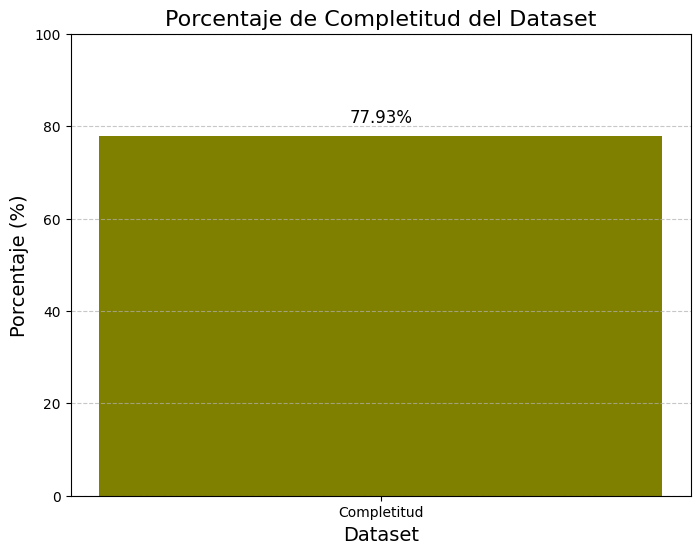

In [ ]:
import matplotlib.pyplot as plt

completeness_percentage = df.count().sum() / df.size * 100

plt.figure(figsize=(8, 6))
plt.bar(['Completitud'], [completeness_percentage], color='olive')
plt.ylim(0, 100)
plt.title('Porcentaje de Completitud del Dataset', fontsize=16)
plt.ylabel('Porcentaje (%)', fontsize=14)
plt.xlabel('Dataset', fontsize=14)
plt.text(0, completeness_percentage + 2, f'{completeness_percentage:.2f}%', ha='center', va='bottom', fontsize=12) #
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- El porcentaje de completitud no es bueno, existen varias columnas muy incompletas que serán irrelevantes para el analisis y modelo asi que las eliminaré

In [ ]:
#ahora vamos a revisar si tengo valores duplicados
duplicados = df[df.duplicated()]

if duplicados.empty:
    print("No se encontraron duplicados en la data")
else:
    print("Se encontraron duplicados en la data")

No se encontraron duplicados en la data


In [ ]:
#veo que columnas tengo para saber cuales puedo descartar
print(df.columns)

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold'],
      dtype='object')


# 3. Limpieza de Datos (Tratamiento de Nulos)

In [ ]:
#con este codigo, voy a eliminar las columnas que considero que es irrelevantes en el modelo que construiré, mi columna objetivo es "race_ethnicity"
# lista de columnas a eliminar
columnas_a_eliminar = ['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
                       '_last_judgment_at', 'birthplace:confidence', 'date_of_birth:confidence',
                       'race_ethnicity:confidence', 'religion:confidence',
                       'sexual_orientation:confidence', 'year_of_award:confidence',
                       'biourl', 'birthplace_gold', 'date_of_birth_gold', 'movie',
                       'person', 'race_ethnicity_gold', 'religion_gold',
                       'sexual_orientation_gold', 'birthplace', 'religion','year_of_award_gold']

# Eliminamos las columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)

In [ ]:
#veo que tipos de valores tengo en mi df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_of_birth       441 non-null    object
 1   race_ethnicity      441 non-null    object
 2   sexual_orientation  441 non-null    object
 3   year_of_award       441 non-null    int64 
 4   award               441 non-null    object
dtypes: int64(1), object(4)
memory usage: 17.4+ KB


# - Tengo 4 Variables Categoricas

In [ ]:
#Reviso como vario la completitud
print(f"porcentaje de completitud: {df.count().sum() / df.size * 100:.2f}%")

porcentaje de completitud: 100.00%


In [ ]:
df.shape

(441, 5)

In [ ]:
df

,date_of_birth,race_ethnicity,sexual_orientation,year_of_award,award
0,30-Sep-1895,White,Straight,1927,Best Director
1,2-Feb-1886,White,Straight,1930,Best Director
2,30-Sep-1895,White,Straight,1931,Best Director
3,23-Feb-1899,White,Straight,1932,Best Director
4,23-Apr-1894,White,Straight,1933,Best Director
...,...,...,...,...,...
436,7-Mar-71,White,Straight,2006,Best Supporting Actress
437,20-Oct-56,White,Straight,2009,Best Director
438,26-Jul-22,White,Straight,1977,Best Supporting Actor
439,31-Aug-28,White,Straight,1999,Best Supporting Actor


- Con estas 7 columnas, veo que tengo lo que necesito para analizar y construir el modelo

In [ ]:
# convertimos la columna date_of_birth a datatime
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')

# extraemos el año
df['date_of_birth'] = df['date_of_birth'].dt.year

# Verificamos
print(df['date_of_birth'].head())

0    1895.0
1    1886.0
2    1895.0
3    1899.0
4    1894.0
Name: date_of_birth, dtype: float64


In [ ]:
df['date_of_birth'] = df['date_of_birth'].astype('Int64')

In [ ]:
df

,date_of_birth,race_ethnicity,sexual_orientation,year_of_award,award
0,1895,White,Straight,1927,Best Director
1,1886,White,Straight,1930,Best Director
2,1895,White,Straight,1931,Best Director
3,1899,White,Straight,1932,Best Director
4,1894,White,Straight,1933,Best Director
...,...,...,...,...,...
436,<NA>,White,Straight,2006,Best Supporting Actress
437,<NA>,White,Straight,2009,Best Director
438,<NA>,White,Straight,1977,Best Supporting Actor
439,<NA>,White,Straight,1999,Best Supporting Actor


In [ ]:
# Crear variables dummy para las variables categóricas "sexual_orientation", "race_ethnicity" y "award"
df = pd.get_dummies(df, columns=['sexual_orientation', 'award', 'race_ethnicity' ])
df.head()

,date_of_birth,year_of_award,sexual_orientation_Bisexual,sexual_orientation_Gay,sexual_orientation_Lesbian,sexual_orientation_Matter of Dispute,sexual_orientation_Na,sexual_orientation_Straight,award_Best Actor,award_Best Actress,award_Best Director,award_Best Supporting Actor,award_Best Supporting Actress,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White
0,1895,1927,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
1,1886,1930,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
2,1895,1931,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
3,1899,1932,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
4,1894,1933,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True


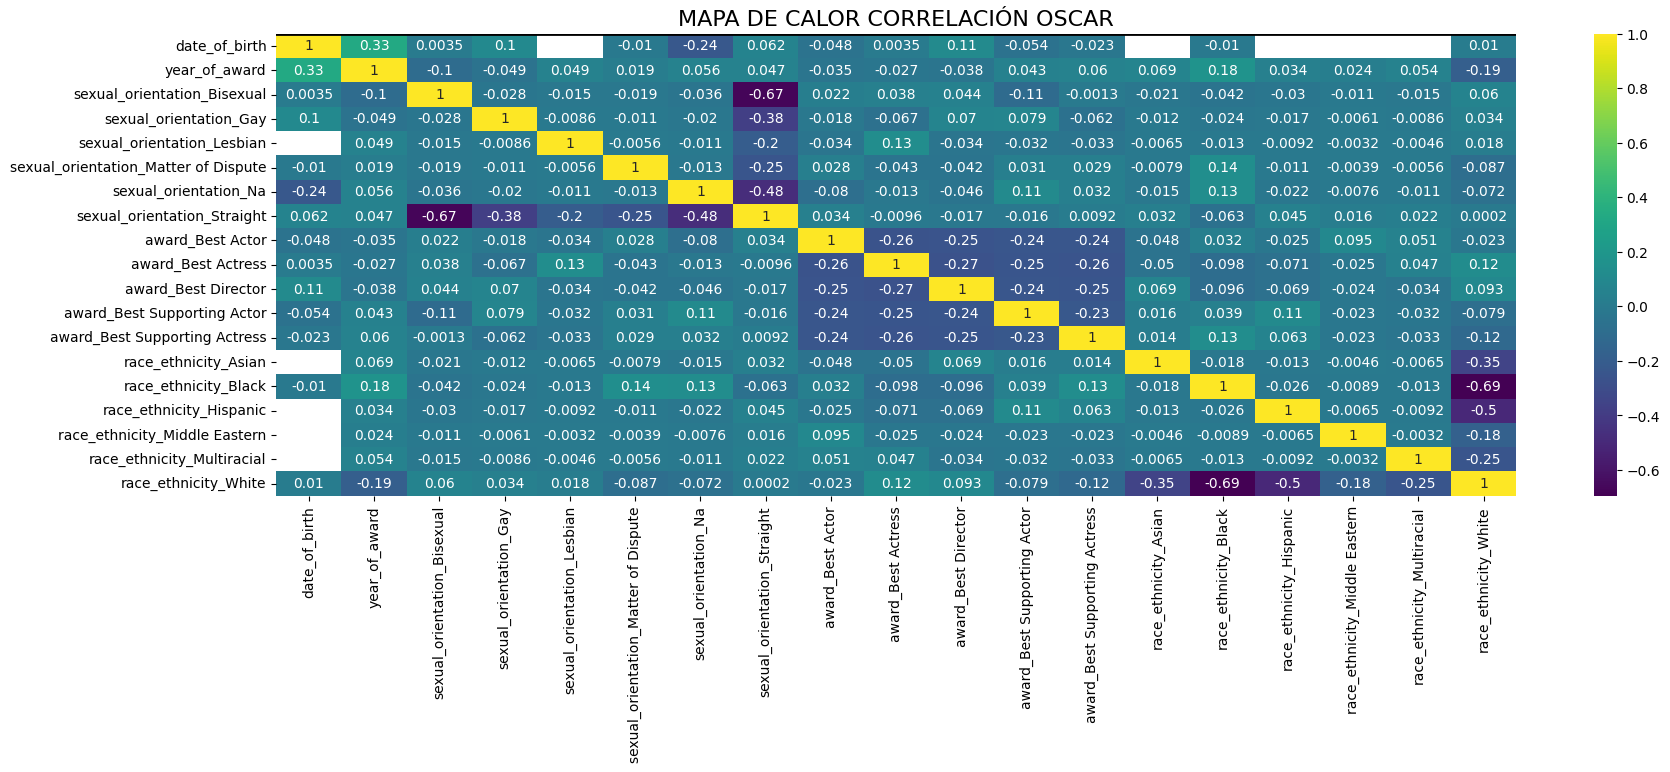

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la correlación
corr = df.corr()

# Configuramos el tamaño de la figura (en pulgadas)
plt.figure(figsize=(20, 6))  # Cambia los valores para ajustar el tamaño

# Dibujamos el mapa de calor con Seaborn
sns.heatmap(corr, annot=True, cmap='viridis')

# Agregamos un título o encabezado al gráfico
plt.title('MAPA DE CALOR CORRELACIÓN OSCAR', fontsize=16)

# Agregamos una línea debajo del título
plt.axhline(y=0, color='black', linewidth=2, xmin=0, xmax=1)  # Cambia el grosor (linewidth) y el color si es necesario

# Mostramos el gráfico
plt.show()

In [ ]:
#tipos de valores tengo en df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   date_of_birth                         78 non-null     Int64
 1   year_of_award                         441 non-null    int64
 2   sexual_orientation_Bisexual           441 non-null    bool 
 3   sexual_orientation_Gay                441 non-null    bool 
 4   sexual_orientation_Lesbian            441 non-null    bool 
 5   sexual_orientation_Matter of Dispute  441 non-null    bool 
 6   sexual_orientation_Na                 441 non-null    bool 
 7   sexual_orientation_Straight           441 non-null    bool 
 8   award_Best Actor                      441 non-null    bool 
 9   award_Best Actress                    441 non-null    bool 
 10  award_Best Director                   441 non-null    bool 
 11  award_Best Supporting Actor           441 non

In [ ]:
#ahora necesito saber si mi DF tienen valores NaN, ya que para realizar la prediccion, no debe tener valores NaN
tiene_nan = df.isna().any().any()

print(f"El DataFrame tienen algun NaN values? {tiene_nan}")

El DataFrame tienen algun NaN values? True


- Terminé de preparar los datos,  usaré Random Forest como nuestro modelo inicial, dado que el objetivo es clasificar la raza/etnicidad del ganador, un problema de clasificación multiclase y aplicaremos Grid Search para el ajuste de hiperparámetros. Esto nos permitirá buscar la mejor combinación de hiperparámetros para mejorar la precisión del modelo y reducir la varianza.

# Entrenamiento del Modelo con Random Forest

Mejores parámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9325842696629213
F1-Score: 0.9325842696629213


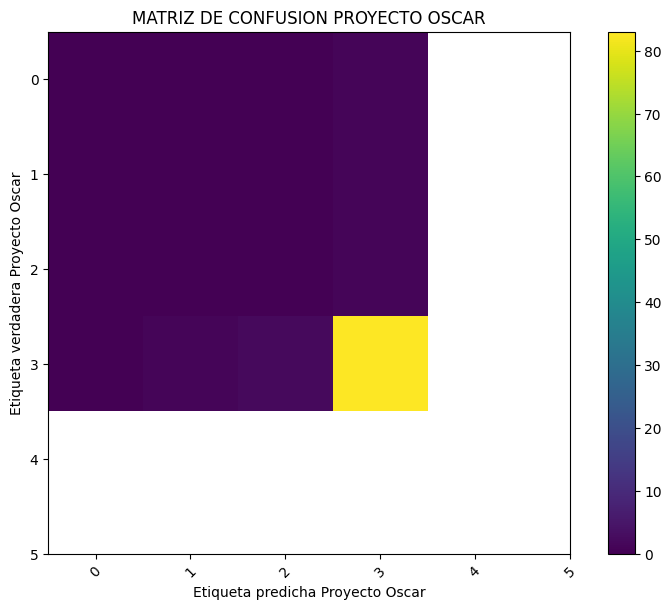

In [ ]:
# Preparación de los datos
X = df.drop(columns=[col for col in df.columns if 'race_ethnicity' in col])
y = df[[col for col in df.columns if 'race_ethnicity' in col]].idxmax(axis=1)
y = LabelEncoder().fit_transform(y)

# Imputación de NaNs
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Definición y ajuste de hiperparámetros del modelo (balanceamos las clases ya que nuestro conjunto de datos no se encuentra balanceado)
class_weights = 'balanced'
model = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# creamos el mejor modelo
best_model = grid_search.best_estimator_

# hacemos predicciones
y_pred = best_model.predict(X_test)

# Evaluamos
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("F1-Score:", f1)

# Matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.viridis)
plt.title('MATRIZ DE CONFUSION PROYECTO OSCAR')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.tight_layout()
plt.ylabel('Etiqueta verdadera Proyecto Oscar')
plt.xlabel('Etiqueta predicha Proyecto Oscar')
plt.show()


1- **Mejores parámetros:** {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

- **max_depth:** Este hiperparámetro define la profundidad máxima de los árboles de decisión dentro del modelo Random Forest. En este caso, se ha seleccionado una profundidad máxima de 10, lo que significa que los árboles no podrán crecer más allá de 10 niveles. Un valor limitado ayuda a evitar el sobreajuste al imponer restricciones en la complejidad de los árboles.

- **min_samples_split:** Este valor representa el número mínimo de muestras requeridas para dividir un nodo interno. Aquí, el valor es 2, lo que significa que un nodo se dividirá si tiene al menos dos muestras.
- **n_estimators:** Este es el número de árboles en el bosque. En este caso, se han entrenado 100 árboles, lo que es típico para obtener un equilibrio entre rendimiento y eficiencia computacional.

**2-Accuracy: 0.9325842696629213:**

- **La precisión (accuracy)** es la proporción de predicciones correctas entre el total de predicciones realizadas. En este caso, el modelo ha alcanzado una precisión del 93.26%, lo que significa que predice correctamente aproximadamente el 93.26% de los ejemplos del conjunto de prueba.

**3-F1-Score: 0.9325842696629213:**

- **El F1-Score** es una métrica que combina la precisión (precision) y el recall (sensibilidad). Es particularmente útil en casos de datos desequilibrados. Un F1-Score de 0.93 indica que el modelo tiene un buen equilibrio entre precisión y recall, lo que sugiere que maneja bien tanto las predicciones correctas como los falsos positivos y negativos.

En resumen, el modelo Random Forest con los mejores hiperparámetros seleccionados (max_depth = 10, min_samples_split = 2, n_estimators = 100) está ofreciendo un alto rendimiento, con un accuracy y F1-Score de aproximadamente 93%.









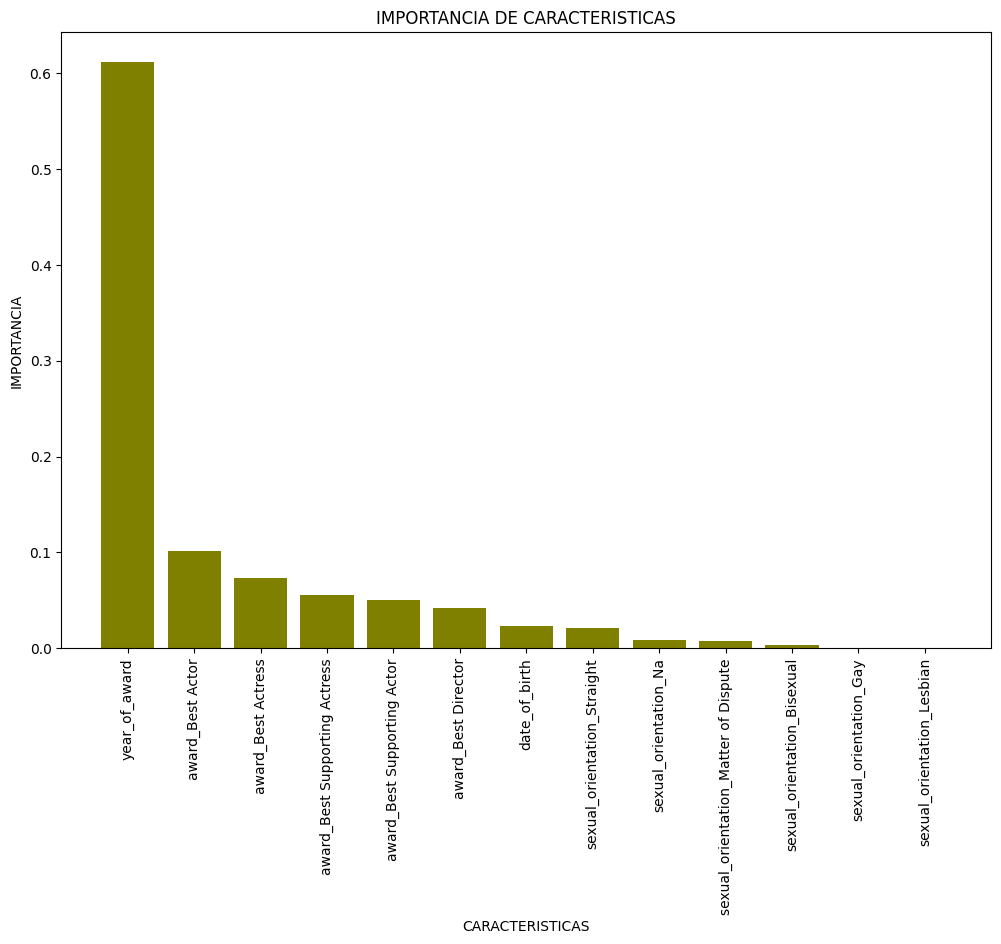

In [ ]:
#La Gráfica de Importancia de las Características complementa la accuracy y el F1-score, al proporcionar insights sobre qué características están influyendo más en las predicciones del modelo

# Asumiendo que 'best_model' es tu modelo entrenado de Random Forest
feature_importances = best_model.feature_importances_

# Obteniendo los nombres de las características
feature_names = X.columns

# Ordenando las características por importancia
indices = np.argsort(feature_importances)[::-1]

# Creando la gráfica
plt.figure(figsize=(12, 8))
plt.title("IMPORTANCIA DE CARACTERISTICAS")
plt.bar(range(X.shape[1]), feature_importances[indices],
        color="olive", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("CARACTERISTICAS")
plt.ylabel("IMPORTANCIA")
plt.show()

**Eje X (Características):**

El eje horizontal (X) muestra las diferentes características que se están evaluando. Las características incluyen:

- Year_of_award: El año en que se otorgó un premio.
- premio_Mejor Actor: Un premio al Mejor Actor.
- premio_Mejor Actriz: Un premio a la Mejor Actriz.
- premio_Mejor Actriz de Reparto: Un premio a la Mejor Actriz de Reparto.
- premio_Mejor Actor de Reparto: Un premio al Mejor Actor de Reparto.
- premio_Mejor Director: Un premio al Mejor Director.
- date_of_birth: La fecha de nacimiento.
- sexual_orientation_Straight, sexual_orientation_Na, sexual_orientation_Matter of Dispute, sexual_orientation_Bisexual, sexual_orientation_Gay, sexual_orientation_Lesbian: Diferentes categorías de orientación sexual.

**Eje Y (Importancia):**

El eje vertical (Y) representa la importancia de cada característica. La importancia se mide en una escala de 0.0 a 0.6, lo que sugiere que se trata de una medida relativa o normalizada.

**Análisis de las Barras:**

- Year_of_award: Esta característica tiene la barra más alta, lo que indica que es la característica más importante según la métrica utilizada. Su importancia está alrededor de 0.6.
- premio_Mejor Actor, premio_Mejor Actriz, premio_Mejor Actriz de Reparto, premio_Mejor Actor de Reparto, premio_Mejor Director: Estas características relacionadas con los premios también tienen una importancia relativamente alta, aunque menor que "year_of_award". Sus importancias están en el rango de 0.04 a 0.1.
- date_of_birth: La importancia de la fecha de nacimiento es baja, alrededor de 0.02.
- sexual_orientation_...: Las diferentes categorías de orientación sexual tienen las importancias más bajas, todas por debajo de 0.01.
Interpretación general:

El gráfico muestra que el año en que se otorga un premio es el factor más determinante en el conjunto de datos, seguido por los premios individuales (Mejor Actor, Mejor Actriz, etc.). La fecha de nacimiento y la orientación sexual tienen una influencia mucho menor.

# Creación de ApiRest

In [ ]:
!pip install flask pyngrok

In [ ]:
from pyngrok import ngrok

# generé un token unico registrando una cuenta en ngrok
ngrok.set_auth_token('2tJMqwscs8crdE3OnOFysIfPkDl_7EXKr6zjEiN2CNw35NKPu')

In [ ]:
from flask import Flask, request, jsonify
from pyngrok import ngrok

# Inicializamos la aplicación Flask
app = Flask(__name__)

# Definimos una ruta y un método para hacer predicciones
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = [0]  # Simulamos de una predicción
    return jsonify({'prediction': str(prediction)})

# Detenemos ngrok si está corriendo
ngrok.kill()

# Configuramos el túnel ngrok
ngrok_tunnel = ngrok.connect(5000)
print('Public URL:', ngrok_tunnel.public_url)

# Ejecutamos la aplicación Flask
# Usamos `debug=False` y `use_reloader=False` para evitar problemas al reiniciar el servicio ngrok
app.run(port=5000, debug=False, use_reloader=False)

Public URL: https://7945-34-143-252-37.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
import requests
import json

# URL de la API
url = 'https://4e18-186-106-11-247.ngrok-free.app' # ACA MI DUDAAAAAAAA

# Datos de entrada para la predicción
data = {
    'edad': 45,
    'categoria_premio': 'award_Best Director',
    'año': 2000
}

# Convertimos los datos a JSON y enviamos la solicitud POST a la API
response = requests.post(url, json=data)

# Imprimos la respuesta de la API
print(response.text)

<!DOCTYPE html>
<html class="h-full" lang="en-US" dir="ltr">
  <head>
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Regular-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-RegularItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Medium-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Semibold-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-MediumItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/ibm-plex-mono/IBMPlexMono-Tex